# Data Processing and Neural Network

### PHY 456
### Leo Sanchez

Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense

from keras.layers import Dense
from keras.utils import to_categorical
from keras.layers import Normalization
from keras import layers, ops
import re

/Users/leo/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


---

Data path

In [2]:
path = "/Users/leo/Library/CloudStorage/OneDrive-UniversityofMountUnion/PHY 456 Research/Research data/training_data_0.0-0.83.txt"

---

Data Processing

  documentation [re](https://docs.python.org/3/library/re.html)

In [3]:
with open("/Users/leo/Library/CloudStorage/OneDrive-UniversityofMountUnion/PHY 456 Research/Research data/training_data_0.0-0.83.txt", "r") as file:
    data = file.read()

pattern = re.compile(r"ECCD Energy for (.*?) density (\d+) shell and (\d+) particles\n(.*?)\n"
                     r"-+\n"
                     r"Eref Energy for .*?\n(.*?)\n"
                     r"-+\n"
                     r"Embpt2 Energy for .*?\n(.*?)\n", re.DOTALL)


Matching the data set

In [4]:
matches = pattern.findall(data)

df = pd.DataFrame(matches, columns=["density", "shell", "particles", "ECCD", "Eref", "Embpt2"])

df[["density", "shell", "particles", "ECCD", "Eref", "Embpt2"]] = df[["density", "shell", "particles", "ECCD", "Eref", "Embpt2"]].astype(float)

print(df)

      density  shell  particles           ECCD           Eref         Embpt2
0        0.01    1.0        2.0      -0.015393       0.000000      -0.015404
1        0.01    2.0        2.0      -0.019234       0.000000      -0.019254
2        0.01    2.0       14.0  156718.518532  156718.884771  156718.517299
3        0.01    3.0        2.0      -0.019992       0.000000      -0.020015
4        0.01    3.0       14.0  156718.474172  156718.884771  156718.472927
...       ...    ...        ...            ...            ...            ...
2221     0.85    6.0        2.0      -0.019395       0.000000      -0.021499
2222     0.85    6.0       14.0      18.763260      19.262202      18.627217
2223     0.85    6.0       38.0      44.215057      45.405740      43.752244
2224     0.85    6.0       54.0      61.656654      62.877706      61.365576
2225     0.85    6.0       66.0      78.319242      79.930124      77.393800

[2226 rows x 6 columns]


Saving as a CSV

In [5]:
df.to_csv("training_data.csv",index=False)

Importing new CSV back again

In [6]:
training_data = pd.read_csv("training_data")

In [17]:
training_data.max()

density         8.500000e-01
shell           7.000000e+00
particles       1.140000e+02
ECCD            1.276175e+06
Eref            1.276178e+06
Embpt2          1.276175e+06
E_MCDHF_pred    1.276193e+06
dtype: float64

In [18]:
training_data.min()

density         0.010000
shell           1.000000
particles       2.000000
ECCD           -0.021067
Eref            0.000000
Embpt2         -0.021554
E_MCDHF_pred   -0.086626
dtype: float64

In [7]:
training_data.columns

Index(['density', 'shell', 'particles', 'ECCD', 'Eref', 'Embpt2'], dtype='object')

---

# NN integration

X and y data

In [8]:

df = training_data

X = df[['density', 'shell', 'particles', 'ECCD', 'Embpt2']].values

y = df['ECCD'] + (df['ECCD'] - df['Embpt2'])


Splitting data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

NN structure 

In [10]:
model = models.Sequential([
    layers.Input(shape=(5,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='linear') 
])

model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=200, batch_size=32, verbose=1)

Epoch 1/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - loss: 770885760.0000 
Epoch 2/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - loss: 191381632.0000
Epoch 3/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - loss: 32313626.0000
Epoch 4/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - loss: 4708.6851
Epoch 5/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - loss: 932.8292
Epoch 6/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - loss: 862.7197
Epoch 7/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - loss: 789.3275
Epoch 8/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - loss: 707.1279
Epoch 9/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - loss: 671.5089
Epoch 10/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - loss: 592.6803
Epoch 11/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - loss: 523.5231
Epoch 12/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 439.2918
Epoch 13/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 362.2378  
Epoch 14/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - loss: 294.3

Prediction

In [11]:
df['E_MCDHF_pred'] = model.predict(X)

print(df[['ECCD', 'Embpt2', 'E_MCDHF_pred']].head())

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step
            ECCD         Embpt2   E_MCDHF_pred
0      -0.015393      -0.015404       0.146421
1      -0.019234      -0.019254       0.043228
2  156718.518532  156718.517299  156721.046875
3      -0.019992      -0.020015       0.040467
4  156718.474172  156718.472927  156721.187500


Fitting

In [12]:
model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=1)

Epoch 1/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - loss: 91.3217
Epoch 2/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - loss: 80.7447
Epoch 3/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - loss: 75.5886
Epoch 4/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 86.1106
Epoch 5/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - loss: 137.7628
Epoch 6/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 67.7158
Epoch 7/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - loss: 201.5021
Epoch 8/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - loss: 145.6483
Epoch 9/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - loss: 153.7182
Epoch 10/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - loss: 91.5007
Epoch 11/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - loss: 74.0476
Epoch 12/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - loss: 75.6303
Epoch 13/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - loss: 73.6338
Epoch 14/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - loss: 69.6490
Epoch 15/200
56/56 ━━━━━━

Predicting $E_{MCDHF}$ from model

In [13]:
y_pred = model.predict(X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


Loss Function and Accuracy

In [14]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")

Mean Squared Error: 591.9005795071414
R-squared Score: 0.9999997741822605


### run 1:
Mean Squared Error: 8.424061948277416
R-squared Score: 0.9999999968096789

### run 2:
Mean Squared Error: 2392459.392438513
R-squared Score: 0.9993737308948655

### run 3:
Mean Squared Error: 1.5322583174554305
R-squared Score: 0.9999999996815855

### run 4:
Mean Squared Error: 11.599795197791403
R-squared Score: 0.9999999954974157

### run 5:
Mean Squared Error: 2576.4063487000963
R-squared Score: 0.9999997025692736

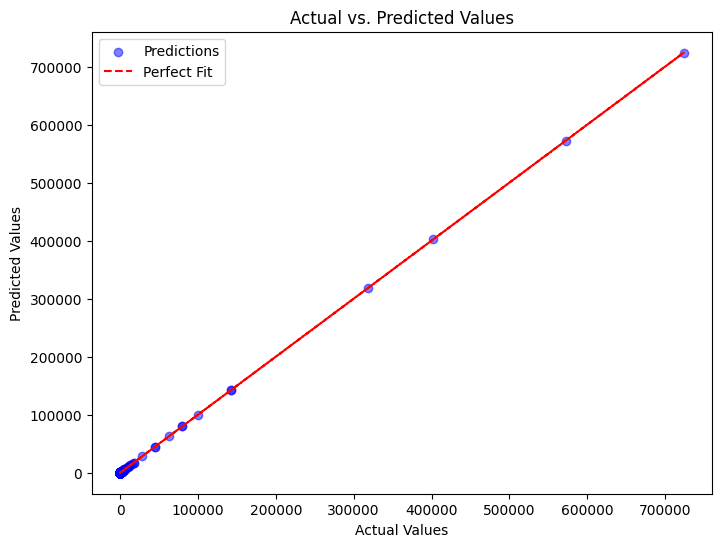

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label="Predictions")
plt.plot(y_test, y_test, color='red', linestyle="--", label="Perfect Fit")  # Ideal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()